Some explanation of erosion, dilation, opening and closing: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook

from matplotlib.pyplot import rcParams as rc
rc['figure.figsize'] = [8.0,6.0]

<IPython.core.display.Javascript object>


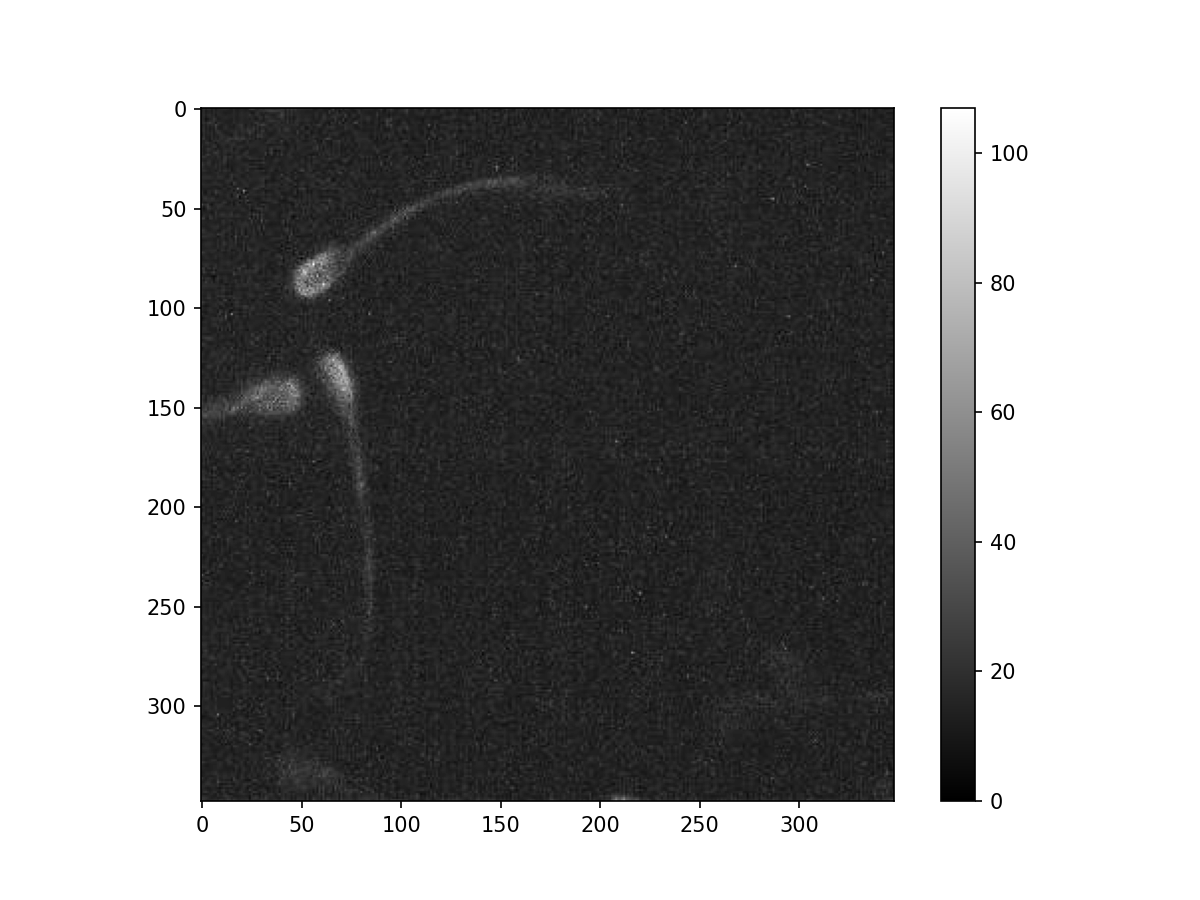

In [6]:
# Read the image as a grayscale image
img = cv2.imread('MAX_sperm00068_t96.jpg', 0) #sperm00068_t99_z8.jpg

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


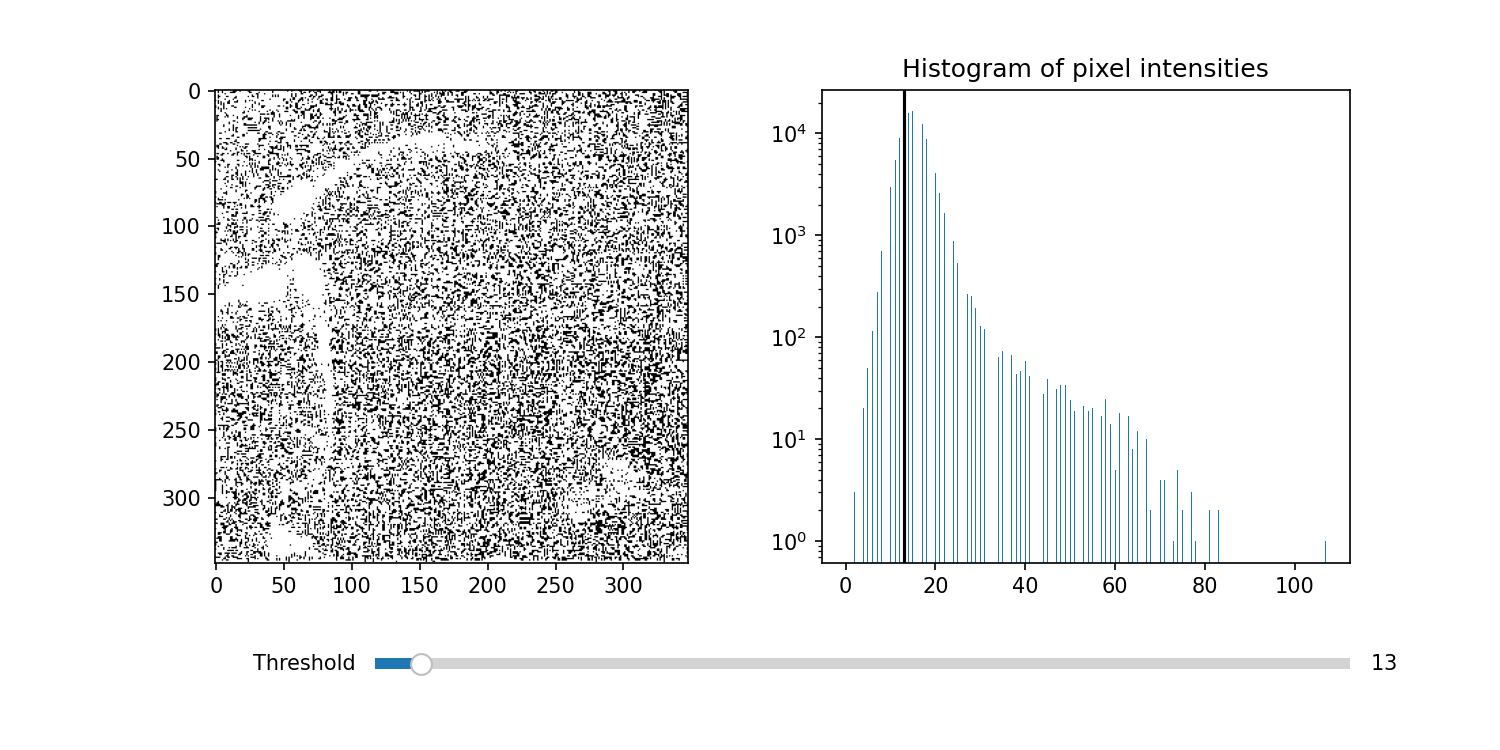

In [7]:
# Plot the thresholded image and the original's image histogram
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(bottom=0.25)

thresh_init = 25
ret,img_thresh = cv2.threshold(img, thresh_init, 255, 0)
im = axs[0].imshow(img_thresh, cmap='gray')
#axs[0].axis('off')

axs[1].hist(img.flatten(), bins='auto')
axs[1].set_yscale('log')
axs[1].set_title('Histogram of pixel intensities')

# Create the Slider
thresh_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(
    ax=thresh_ax,
    label='Threshold',
    valmin=1,
    valmax=255,
    valinit=thresh_init,
    valstep=1,
    initcolor='none'
)

# Create the vertical line on the histogram
lower_limit_line = axs[1].axvline(slider.val, color='k')

def update(val):
    # Update the image's threshhold
    ret,img_thresh = cv2.threshold(img, val, 255, 0)
    axs[0].imshow(img_thresh, cmap='gray')
    # Update the position of the vertical line
    lower_limit_line.set_xdata([val, val])
    # Redraw the figure to ensure it updates
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

<IPython.core.display.Javascript object>


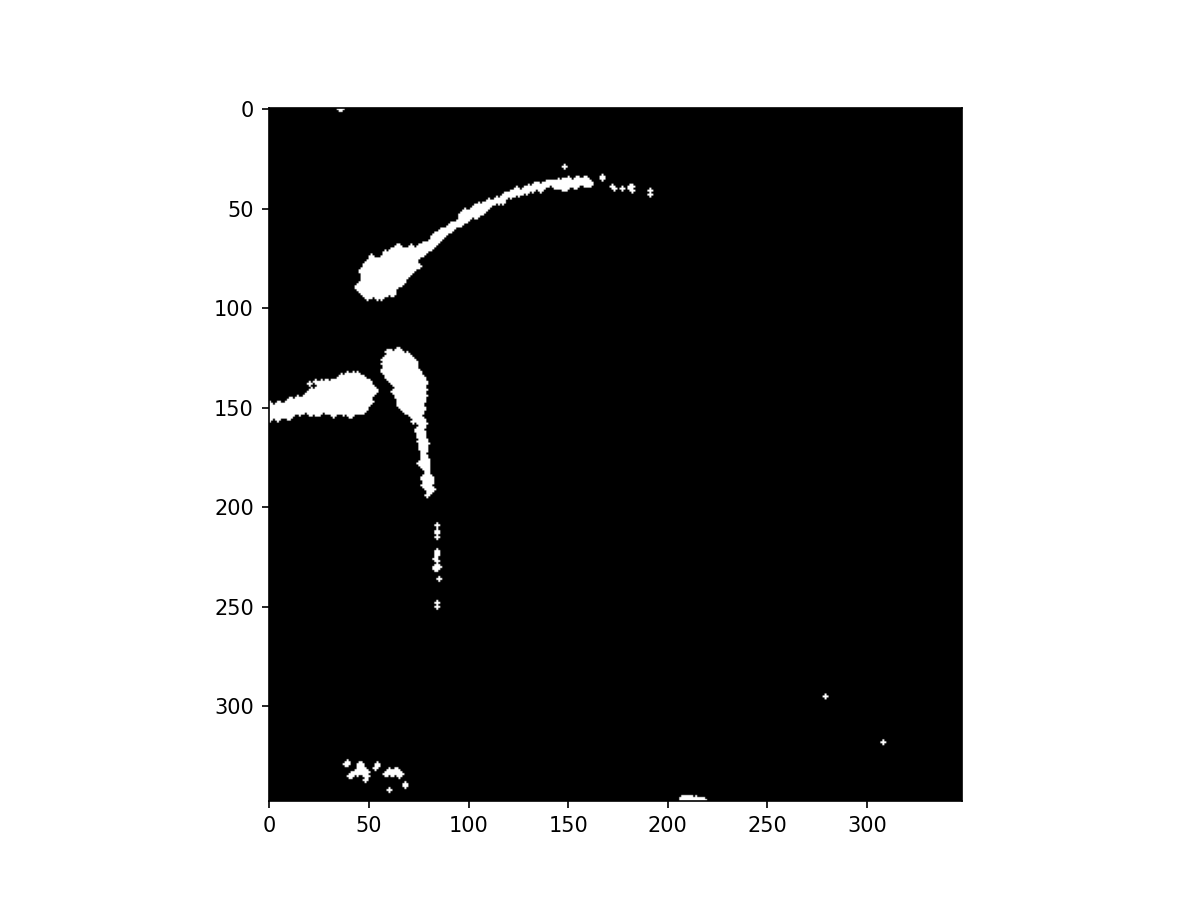

In [11]:
ret,img_thresh = cv2.threshold(img, slider.val, 255, 0)

# Create an empty skeleton and get a Cross Shaped Kernel
skel = np.zeros(img.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Close the image to connect the tails
closed = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, element)

# Open the image to remove the noise
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, element)

plt.imshow(opened, cmap='gray')
plt.show()

## Showing only the skeleton

In [12]:
# Step 1: Create an empty skeleton
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, element)    
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img_thresh, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img_thresh, element)
    skel = cv2.bitwise_or(skel,temp)
    img_thresh = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img_thresh)==0:
        break

<IPython.core.display.Javascript object>


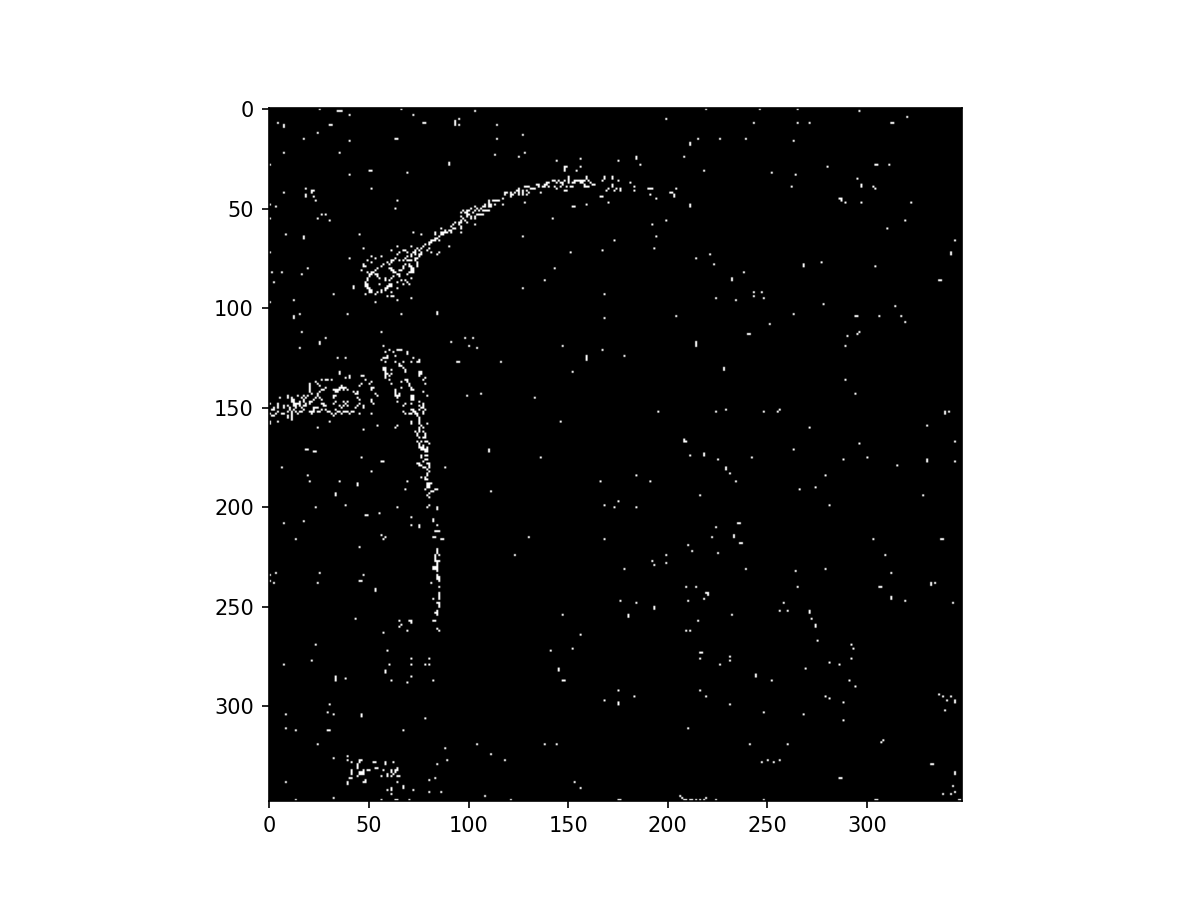

In [13]:
# Displaying the final skeleton
plt.imshow(skel, cmap='gray')
plt.show()

#cv2.imshow("Skeleton",skel)
#cv2.waitKey(0)
#cv2.destroyAllWindows()